# Demo of PTAStateSpaceAnalysis

This notebook demonstrates how to use the methods in this repository.


The notebook is organised as follows:




## 0. Setup

In [32]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src") 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
#some useful quantities
year = 3.154e7 # in seconds
week = 604800  # in seconds

## 1. Making fake data 



### 1.1 Creating a GW signal
To start, lets generate a stochastic GW background by sampling $M$ BHs, each with 7 parameters.

In [34]:
from make_synthetic_data import BH_population 


#Define the parameters for the power law over Ω
α = -3.0 #Exponent of the power law for the PDF of Ω
Ω_min = 1/(10*year) #lower bound on the Ω power law distribution. Set by Tobs
Ω_max = 1/(week)  #upper bound on the Ω power law distribution. Set by dt
M = int(1e4)

universe_i_sgwb = BH_population(α,Ω_min,Ω_max,M) #this is a random realisation of the universe


INFO:root:Generating a GW signal with M = 10000


For small $M$, you can also specify the 7 parameters explicitly. In this case the parameters $\alpha$, $\Omega_{\rm min}$, $\Omega_{\rm max}$ and $M$ are ignored.

In [35]:
import numpy as np
parameters_dictionary = {
  "Ω": np.array([5e-7]),
  "h": np.array([1e-12]),
  "φ0": np.array([0.20]),
  "ψ": np.array([2.50]),
  "ι": np.array([1.0]),
  "δ": np.array([1.0]),
  "α": np.array([1.0])
}

universe_single_source = BH_population(M=1,parameters_dictionary=parameters_dictionary) #this is a random realisation of the universe


INFO:root:Generating a GW signal with M = 1


### 1.2 Creating a PTA

Now we specify the pulsars that constitute our PTA. For this demo we use the pulsars specified in `data/NANOGrav_pulsars.csv`

In [36]:
from make_synthetic_data import Pulsars
PTA = Pulsars(pulsar_file='../data/NANOGrav_pulsars.csv',
              γp=1e-13,
              dt_weeks=1,
              Tobs_years=10)

### 1.3 $a(t)$ signal 

Given our GW signal and our PTA, we can calculate the $a^{(n)}(t)$ redshift. 


In [37]:
from gravitational_waves import GW

SGWB = GW(universe_i_sgwb,PTA)
a = SGWB.compute_a()

Text(0.5, 0, '$t$ [years]')

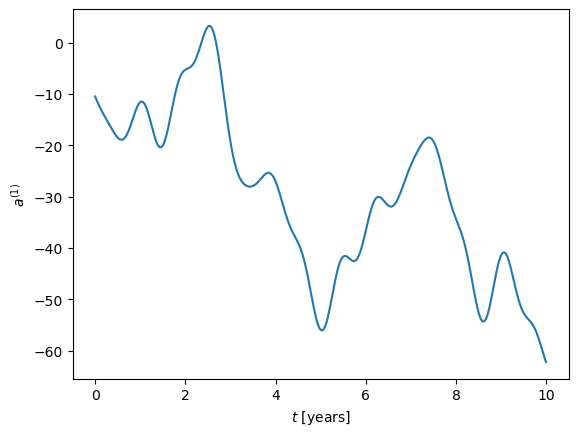

In [38]:
import matplotlib.pyplot as plt 
t = PTA.t / year 

psr_index = 1
plt.plot(t,a[:,0]) 
plt.ylabel(rf'$a^{{({psr_index})}}$')
plt.xlabel(r'$t$ [years]')

We can do the same thing for a single source:

Text(0.5, 0, '$t$ [years]')

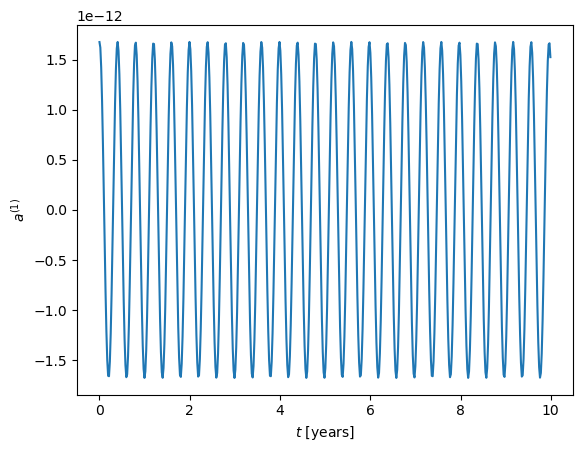

In [39]:
GW_single_source= GW(universe_single_source,PTA)
a = GW_single_source.compute_a()

psr_index = 1
plt.plot(t,a[:,0]) 
plt.ylabel(rf'$a^{{({psr_index})}}$')
plt.xlabel(r'$t$ [years]')